## 금융 데이터 수집 라이브러리를 이용한 삼성 전자 주가 수집

In [22]:
#https://github.com/FinanceData/FinanceDataReader

import pandas as pd
import numpy as np
import FinanceDataReader

In [23]:
# !pip install finance-datareader

import FinanceDataReader as fdr

df_sam = fdr.DataReader('005930', start='2000')

print(df_sam)

# 단기로 하는게 성능이 좋음.

# 마지막 날은 아직 종가도 안나왔는데..01 19일자 벌써 종가가 나오다니 저걸 없애야함.

# 종가를 맞추는게 목적.

             Open   High    Low  Close    Volume    Change
Date                                                      
2000-01-04   6000   6110   5660   6110   1483967  0.148496
2000-01-05   5800   6060   5520   5580   1493604 -0.086743
2000-01-06   5750   5780   5580   5620   1087810  0.007168
2000-01-07   5560   5670   5360   5540    806195 -0.014235
2000-01-10   5600   5770   5580   5770    937615  0.041516
...           ...    ...    ...    ...       ...       ...
2024-01-15  73200  74000  73200  73900  13212339  0.010944
2024-01-16  73500  73700  72500  72600  14760415 -0.017591
2024-01-17  73100  73300  71000  71000  22683660 -0.022039
2024-01-18  71600  72000  70700  71700  17853397  0.009859
2024-01-19  73500  74200  73000  74000  12897551  0.032078

[5937 rows x 6 columns]


In [24]:
df_sam.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5937 entries, 2000-01-04 to 2024-01-19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5937 non-null   int64  
 1   High    5937 non-null   int64  
 2   Low     5937 non-null   int64  
 3   Close   5937 non-null   int64  
 4   Volume  5937 non-null   int64  
 5   Change  5937 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 324.7 KB


In [25]:
### 마지막 행 제거

df_sam = df_sam.drop(index=['2024-01-19'])
print(df_sam)

             Open   High    Low  Close    Volume    Change
Date                                                      
2000-01-04   6000   6110   5660   6110   1483967  0.148496
2000-01-05   5800   6060   5520   5580   1493604 -0.086743
2000-01-06   5750   5780   5580   5620   1087810  0.007168
2000-01-07   5560   5670   5360   5540    806195 -0.014235
2000-01-10   5600   5770   5580   5770    937615  0.041516
...           ...    ...    ...    ...       ...       ...
2024-01-12  73000  74100  72800  73100  13038939 -0.001366
2024-01-15  73200  74000  73200  73900  13212339  0.010944
2024-01-16  73500  73700  72500  72600  14760415 -0.017591
2024-01-17  73100  73300  71000  71000  22683660 -0.022039
2024-01-18  71600  72000  70700  71700  17853397  0.009859

[5936 rows x 6 columns]


In [26]:
### 연도별 데이터 추출 기능 
stock1= df_sam.loc['2023', :]

print(stock1)

             Open   High    Low  Close    Volume    Change
Date                                                      
2023-01-02  55500  56100  55200  55500  10031448  0.003617
2023-01-03  55400  56000  54500  55400  13547030 -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746
...           ...    ...    ...    ...       ...       ...
2023-12-21  74600  75000  74300  75000  13478766  0.002674
2023-12-22  75800  76300  75400  75900  14515608  0.012000
2023-12-26  76100  76700  75700  76600  13164909  0.009223
2023-12-27  76700  78000  76500  78000  20651042  0.018277
2023-12-28  77700  78500  77500  78500  17797536  0.006410

[245 rows x 6 columns]


In [27]:
### 연도별 + 월별 데이터 추출 가능
stock2 = df_sam.loc['2023-01':'2023-06', :]

print(stock2)

             Open   High    Low  Close    Volume    Change
Date                                                      
2023-01-02  55500  56100  55200  55500  10031448  0.003617
2023-01-03  55400  56000  54500  55400  13547030 -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746
...           ...    ...    ...    ...       ...       ...
2023-06-26  71700  72500  71500  72400  10541901  0.011173
2023-06-27  72500  72600  72000  72600   9442997  0.002762
2023-06-28  72600  72700  72000  72700   8783093  0.001377
2023-06-29  73100  73400  72400  72400  12229967 -0.004127
2023-06-30  72500  72700  71700  72200  11694765 -0.002762

[123 rows x 6 columns]


In [28]:
### 데이터프레임으로부터 인덱스 추출
idx = df_sam.index
print(idx)

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18'],
              dtype='datetime64[ns]', name='Date', length=5936, freq=None)


In [29]:
## 년도 정보 추출
year = idx.year
print(f'데이터프레임 인덱스의 연도정보 : \n{year}')

데이터프레임 인덱스의 연도정보 : 
Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Date', length=5936)


In [30]:
## 월별 정보 추출
months = idx.month
print(f'데이터프레임 인덱스의 월별정보 : \n{months}')

데이터프레임 인덱스의 월별정보 : 
Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=5936)


In [31]:
## 일별 정보 추출
days = idx.day
print(f'데이터프레임 인덱스의 일별정보 : \n{days}')

데이터프레임 인덱스의 일별정보 : 
Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
       ...
        5,  8,  9, 10, 11, 12, 15, 16, 17, 18],
      dtype='int32', name='Date', length=5936)


## 데이터 전처리 및 시각화

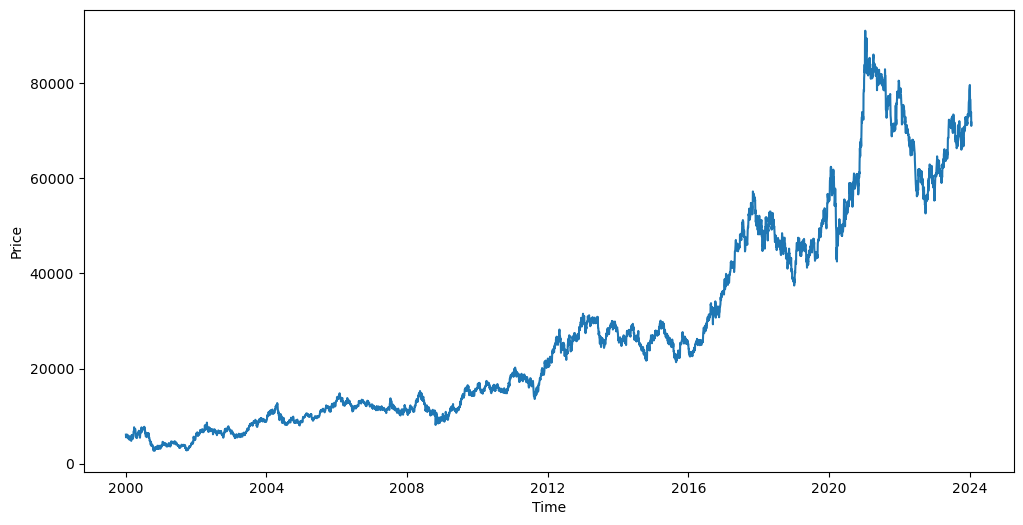

In [34]:
### seaborn lineplot을 이용, 전체 주가 시각화

# 시각화에 필요한 라이브러리 임폴트

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sam, x=df_sam.index, y='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [45]:
### X / y 데이터 생성
X = df_sam.drop(columns=['Close', 'Change'])
y = df_sam.loc[:,['Close']]

print(X)
print('*'*80)
print(y)

             Open   High    Low    Volume
Date                                     
2000-01-04   6000   6110   5660   1483967
2000-01-05   5800   6060   5520   1493604
2000-01-06   5750   5780   5580   1087810
2000-01-07   5560   5670   5360    806195
2000-01-10   5600   5770   5580    937615
...           ...    ...    ...       ...
2024-01-12  73000  74100  72800  13038939
2024-01-15  73200  74000  73200  13212339
2024-01-16  73500  73700  72500  14760415
2024-01-17  73100  73300  71000  22683660
2024-01-18  71600  72000  70700  17853397

[5936 rows x 4 columns]
********************************************************************************
            Close
Date             
2000-01-04   6110
2000-01-05   5580
2000-01-06   5620
2000-01-07   5540
2000-01-10   5770
...           ...
2024-01-12  73100
2024-01-15  73900
2024-01-16  72600
2024-01-17  71000
2024-01-18  71700

[5936 rows x 1 columns]


In [ ]:
# min-max scaling으로 0과 1사이로 만들어주면 손실이 날 경우에

# 종가가 10,000원인데 예측이 9,000원이다. 차이가 1,000원.

# 우리는 손실을 mim squared error가 더 커져버린다. 백만단위..

# 평균제곱오차를 쓰기 때문에 min-max scaling을 쓴다.

# 0.1제곱은 0.01 오히려 오차라 더 작아진다. fit_transform을 쓸 것이다

In [46]:
from sklearn.preprocessing import MinMaxScaler


### Normalization(scaling) 진행 ( 누구다 나 0과 1사이로 재조정 강제로 맞추는 일종의 규제를 가하는 개념 )

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다.
# MinMaxScaler : (X - MIN) / ( MAX - MIN )
'''

#==Tfid Vectorizer 한글 영어 굳이 나눠놨다. 변수가 겹치지 않게 해주는 것보다 훨씬 더 중요하다
# 최소 최대가 다르기 때문에 MinMinScaler는 항상 따로 해줘야 한다.
# x와 y도 변형할 것.

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# scaling 실행
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# y가 1차원이니 2차원으로 변경해야함.


print(f'X_scaled의 모양 : \n{X_scaled.shape}')
print('*'*80)
print(f'X_scaled 확인 : \n{X_scaled}')

print(f'y_scaled의 모양 : \n{y_scaled.shape}')
print('*'*80)
print(f'y_scaled의 확인 : \n{y_scaled}')





X_scaled의 모양 : 
(5936, 4)
********************************************************************************
X_scaled 확인 : 
[[0.06644518 0.06311983 0.06324022 0.01643262]
 [0.06423034 0.06260331 0.06167598 0.01653933]
 [0.06367663 0.05971074 0.06234637 0.0120458 ]
 ...
 [0.81395349 0.76136364 0.81005587 0.16344856]
 [0.80952381 0.7572314  0.79329609 0.25118614]
 [0.79291251 0.74380165 0.78994413 0.19769851]]
y_scaled의 모양 : 
(5936, 1)
********************************************************************************
y_scaled의 확인 : 
[[0.03829161]
 [0.0322873 ]
 [0.03274046]
 ...
 [0.79154866]
 [0.77342245]
 [0.78135267]]


In [56]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

# 우리한테 단어는 특정 날짜의 데이터이다. 특정 날짜 몇개를 잡아서 데이터로 만들것인가..

def make_dataset(X, y, window_size=10):
    X_data_total = []
    y_data_total = []

    for start in np.arange(len(X) - window_size):
        
        # X는 데이터의 숫자 5936, - window_size=10, 5926
        # np.arange(5925,0,1) 스텝만큼 한값 덜 간 값 0부터 5925까지.
        #  0       9
        #   1         10
        #    2          11
        #    5925           5934
        # 뒤에 딱 한 개의 5935가 있는 것이다. 0부터 5935해야 5936개
        
        stop = start + window_size
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        # 슬라이싱 0 10 --> 0 - 9 
        y_data = y[stop]
        y_data_total.append(y_data)
        # 인덱싱 10을 넣으면 포함됨.
    return np.array(X_data_total), np.array(y_data_total)
    
        

In [57]:
### 시계열 분석에 적합한 데이터 생성 

# windows_size=10인 X, y 데이터 생성

X_data, y_data = make_dataset(X_scaled, y_scaled, window_size=10)

print(f'X_data의 모양 : \n{X_data.shape}')

print('*'*80)

print(f'y_data의 모양 : \n{y_data.shape}')

X_data의 모양 : 
(5926, 10, 4)
********************************************************************************
y_data의 모양 : 
(5926, 1)


In [60]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

def make_dataset(X, y, window_size=10):
    X_data_total = []
    y_data_total = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        y_data = y[stop]
        y_data_total.append(y_data)
    return np.array(X_data_total), np.array(y_data_total)

#5교육실 휴먼 2:53 PM


'\n# TEST_SIZE 설정\n   (1) TEST_SIZE = 200으로 설정\n   (2) TEST_SIZE = 200은 가장 최근 200일의 데이터로 모델이 주가를 예측\n   (3) 학습은 과거부터 200일 이전의 데이터를 학습\n'

In [68]:
### 학습용 / 검증용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 200으로 설정
   (2) TEST_SIZE = 200은 가장 최근 200일의 데이터로 모델이 주가를 예측
   (3) 학습은 과거부터 200일 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터의 크기 설정
TEST_SIZE = 200

# 학습용 데이터 생성
X_train = X_data[:-200, :, :] #리버스인덱스, 끝번호에서 계산하면 어려울게없다! 
y_train = y_data[:-TEST_SIZE:]


# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:]



## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=0)
# stratify=y_train 분류할때만...
                 
# 결과 확인하기
print(f'학습용 X 데이터의 모양 : {X_train.shape}')
print('*'*80)
print(f'학습용 y 데이터의 모양 : {y_train.shape}')
print('*'*80)

print(f'검증용 X 데이터의 모양 : {X_val.shape}')
print('*'*80)
print(f'검증용 y 데이터의 모양 : {y_val.shape}')

print(f'평가용 X 데이터의 모양 : {X_test.shape}')
print('*'*80)
print(f'평가용 y 데이터의 모양 : {y_test.shape}')

학습용 X 데이터의 모양 : (4580, 10, 4)
********************************************************************************
학습용 y 데이터의 모양 : (4580, 1)
********************************************************************************
검증용 X 데이터의 모양 : (1146, 10, 4)
********************************************************************************
검증용 y 데이터의 모양 : (1146, 1)
평가용 X 데이터의 모양 : (200, 10, 4)
********************************************************************************
평가용 y 데이터의 모양 : (200, 1)


## 주가 예측 모델

In [69]:
'''
모델 정의, feature 데이터의 복잡도가 그렇게 크지 않고 학습해야할 데이터도 10,000개 이하 수준이기 때문에
아주 단순한 모델로도 충분히 좋은 성능을 기대해 볼 수 있습니다. 오히려 너무 복잡한 모델이 과적합을
유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있다.
'''


# 필요한 라이브러리 임폴트
import tensorflow as tf
import random


# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)


# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               activation='tanh',
                               return_sequences=True, # return_sequences를 넣어야 두번 넣었을 때 의미가 생긴다!
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32,
                               activation='tanh',
                               kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(units=1,
                                kernel_initializer=initializer))


# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])


# 모델 확인
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30113 (117.63 KB)
Trainable params: 30113 (117.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
